<a href="https://colab.research.google.com/github/Abhiraj-b/codes/blob/main/stock_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout

In [4]:
def get_stock_data(ticker, start='2020-01-01', end='2025-01-01'):
    stock = yf.download(ticker, start=start, end=end)
    return stock['Close'].values.reshape(-1, 1)



In [5]:
def prepare_data(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)



In [7]:
stock_ticker = 'AAPL'  # Change to any stock symbol
raw_data = get_stock_data(stock_ticker)
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(raw_data)



YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [8]:
train_size = int(len(data_scaled) * 0.8)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

X_train, y_train = prepare_data(train_data)
X_test, y_test = prepare_data(test_data)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)



In [9]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(60, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')




/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0527 - val_loss: 0.0023
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0045 - val_loss: 0.0085
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0025 - val_loss: 0.0041
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0028 - val_loss: 9.8213e-04
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0020 - val_loss: 0.0025
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0022 - val_loss: 8.7721e-04
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0017 - val_loss: 0.0029
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - l

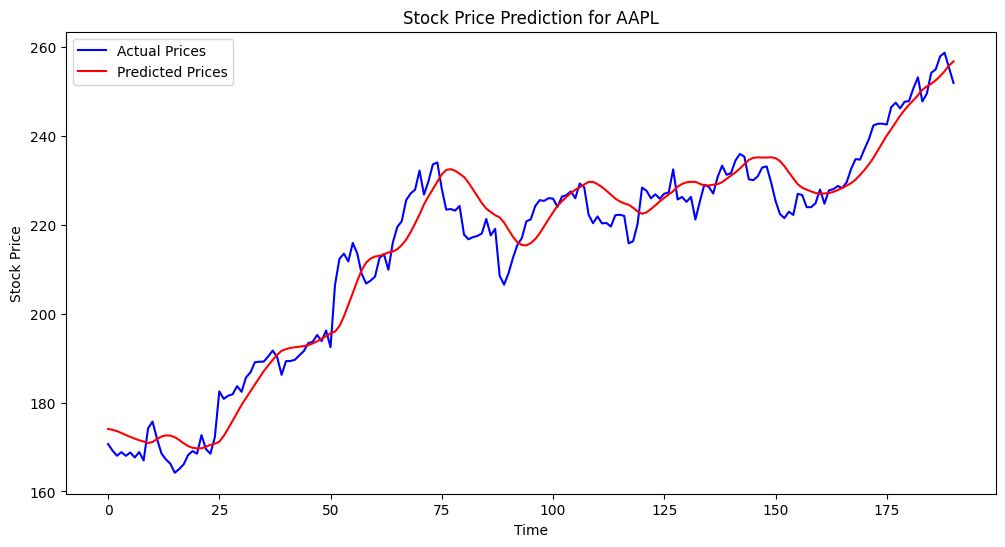

In [10]:
model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title(f'Stock Price Prediction for {stock_ticker}')
plt.show()


